# One hot encoding

In [ ]:
!pip install pythainlp[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 107.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 42.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.9/164.9 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 115.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.9/257.9 kB 32.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 63.3 

In [ ]:
text = [
    'ที่พักสวย วิวดีมาก',
    'วิวสวย ที่พักดีมาก',
    'ที่พักวิวสวย บรรยากาศดีได้ใจ',
    'ที่พักสวย แถมวิวสุดปัง'
]

In [ ]:
from pythainlp.tokenize import word_tokenize

In [ ]:
## tokenization
text_tokens = [word_tokenize(text=sent, engine="newmm") for sent in text]
for tk in text_tokens:
  print(tk)

['ที่พัก', 'สวย', ' ', 'วิว', 'ดีมาก']
['วิว', 'สวย', ' ', 'ที่พัก', 'ดีมาก']
['ที่พัก', 'วิว', 'สวย', ' ', 'บรรยากาศ', 'ดี', 'ได้ใจ']
['ที่พัก', 'สวย', ' ', 'แถม', 'วิว', 'สุด', 'ปัง']


In [ ]:
## list unique word
unique_word = set([w for sent in text_tokens for w in sent])
print(unique_word)

{'แถม', 'บรรยากาศ', 'ปัง', 'ได้ใจ', 'สวย', 'ที่พัก', 'ดี', 'ดีมาก', 'สุด', 'วิว', ' '}


In [ ]:
# map id with dictionary
total_word = len(unique_word)
w2ids = {w:ids for w, ids in zip(unique_word, range(total_word))}
print(w2ids)

{'แถม': 0, 'บรรยากาศ': 1, 'ปัง': 2, 'ได้ใจ': 3, 'สวย': 4, 'ที่พัก': 5, 'ดี': 6, 'ดีมาก': 7, 'สุด': 8, 'วิว': 9, ' ': 10}


In [ ]:
# create one hot encoding function
import numpy as np
def one_hot_encode(x, n_classes):
  return np.eye(n_classes)[x]

In [ ]:
# generate one hot encoding with function
for w, idx in w2ids.items():
  print(f"{w:<10}",'\t', one_hot_encode(idx, total_word))

แถม        	 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
บรรยากาศ   	 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
ปัง        	 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
ได้ใจ      	 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
สวย        	 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
ที่พัก     	 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
ดี         	 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ดีมาก      	 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
สุด        	 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
วิว        	 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
           	 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# generate sentence with one hot encoding in only row 0
all_encoding = []
## map id with dictionary
tokens_ids = [w2ids[tk] for tk in text_tokens[0]]
## create one hot encoding function
tokens_encode = [one_hot_encode(id, total_word) for id in tokens_ids]
print(f"{'word':<5}\t{'id':<5}\t{'encoding':100}")
for tk, id, en in zip(text_tokens[0], tokens_ids, tokens_encode):
  print(f"{tk:<5}\t{id:<5}\t{str(en):<100}")
print(text[0],':',sum(tokens_encode))

word 	id   	encoding                                                                                            
ที่พัก	5    	[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]                                                                  
สวย  	4    	[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]                                                                  
     	10   	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]                                                                  
วิว  	9    	[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]                                                                  
ดีมาก	7    	[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]                                                                  
ที่พักสวย วิวดีมาก : [0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.]


# One-Hot Encoding (Pandas)

In [ ]:
!pip install pythainlp[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
text = [
    'ที่พักสวย วิวดีมาก',
    'วิวสวย ที่พักดีมาก',
    'ที่พักวิวสวย บรรยากาศดีได้ใจ',
    'ที่พักสวย แถมวิวสุดปัง'
]

In [ ]:
from pythainlp.tokenize import word_tokenize

In [ ]:
## tokenization
text_tokens = [word_tokenize(text=sent, engine="newmm") for sent in text]
for tk in text_tokens:
  print(tk)

['ที่พัก', 'สวย', ' ', 'วิว', 'ดีมาก']
['วิว', 'สวย', ' ', 'ที่พัก', 'ดีมาก']
['ที่พัก', 'วิว', 'สวย', ' ', 'บรรยากาศ', 'ดี', 'ได้ใจ']
['ที่พัก', 'สวย', ' ', 'แถม', 'วิว', 'สุด', 'ปัง']


In [ ]:
# temp dataset with pandas
import pandas as pd
df = pd.DataFrame({'text':text_tokens})
df

,text
0,"[ที่พัก, สวย, , วิว, ดีมาก]"
1,"[วิว, สวย, , ที่พัก, ดีมาก]"
2,"[ที่พัก, วิว, สวย, , บรรยากาศ, ดี, ได้ใจ]"
3,"[ที่พัก, สวย, , แถม, วิว, สุด, ปัง]"


In [ ]:
# create one hot encoding with get dummie in pandas
pd.get_dummies(df.text.apply(pd.Series).stack()).sum(level=0)

<ipython-input-6-147ab8243a68>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  pd.get_dummies(df.text.apply(pd.Series).stack()).sum(level=0)


,,ดี,ดีมาก,ที่พัก,บรรยากาศ,ปัง,วิว,สวย,สุด,แถม,ได้ใจ
0,1,0,1,1,0,0,1,1,0,0,0
1,1,0,1,1,0,0,1,1,0,0,0
2,1,1,0,1,1,0,1,1,0,0,1
3,1,0,0,1,0,1,1,1,1,1,0


# One-Hot Encoding with SCIKIT-LEARN

In [ ]:
!pip install pythainlp[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
text = [
    'ที่พักสวย วิวดีมาก',
    'วิวสวย ที่พักดีมาก',
    'ที่พักวิวสวย บรรยากาศดีได้ใจ',
    'ที่พักสวย แถมวิวสุดปัง'
]

In [ ]:
from pythainlp.tokenize import word_tokenize

In [ ]:
## tokenization
text_tokens = [word_tokenize(text=sent, engine="newmm") for sent in text]
for tk in text_tokens:
  print(tk)

['ที่พัก', 'สวย', ' ', 'วิว', 'ดีมาก']
['วิว', 'สวย', ' ', 'ที่พัก', 'ดีมาก']
['ที่พัก', 'วิว', 'สวย', ' ', 'บรรยากาศ', 'ดี', 'ได้ใจ']
['ที่พัก', 'สวย', ' ', 'แถม', 'วิว', 'สุด', 'ปัง']


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [ ]:
# one hot encoding
mlb.fit_transform(text_tokens)

array([[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]])

In [ ]:
# all word we have
mlb.classes_

array([' ', 'ดี', 'ดีมาก', 'ที่พัก', 'บรรยากาศ', 'ปัง', 'วิว', 'สวย',
       'สุด', 'แถม', 'ได้ใจ'], dtype=object)

advantage:
-simple and fast.

disadvantage:

-no word order.

-no semantic information.

-no difference between important words and non-important words.

# Count Vectorizer

same one hot encoding but add frequency

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

texts = ["dog cat fish", "dog cat cat", "dog cat fish fish fish"]
cv = CountVectorizer()
cv_fit = cv.fit_transform(texts)
word_list = cv.get_feature_names_out()

count_list = np.asarray(cv_fit.sum(axis=0))[0]
print(dict(zip(word_list, count_list)))

{'cat': 4, 'dog': 3, 'fish': 4}


In [ ]:
word_list

array(['cat', 'dog', 'fish'], dtype=object)

In [ ]:
cv_fit.toarray()

array([[1, 1, 1],
       [2, 1, 0],
       [1, 1, 3]])

advantage:
-simple and fast.

disadvantage:

-no word order.

-no semantic information.

-no difference between important words and non-important words.

# Tf-idf

TF: Term Frequency
IDF: Inverse document frequency

In [ ]:
texts = ['ใคร|เป็น|แชมป์|ยูฟ่า','ใคร|เป็น|แชมป์|พรีเมียร์ลีก|','ใคร|เป็นแชมป์|ยูฟ่า|ปี|นี้','บอล|พรีเมียร์ลีก|ใคร|เป็น|แชมป์','ลิเวอร์พูล|เป็น|แชมป์|มั้ย|']

In [ ]:
def dummy(doc):
  return doc.split('|')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000,encoding='utf-8',use_idf=True,lowercase=False,tokenizer=dummy,preprocessor=None, stop_words=[])

In [ ]:
# calculate by fit transform
tfidf_fit = tfidf.fit_transform(texts)

In [ ]:
# all of words we have
tfidf.get_feature_names_out()

array(['', 'นี้', 'บอล', 'ปี', 'พรีเมียร์ลีก', 'มั้ย', 'ยูฟ่า',
       'ลิเวอร์พูล', 'เป็น', 'เป็นแชมป์', 'แชมป์', 'ใคร'], dtype=object)

In [ ]:
# tf-idf in each sentence
import numpy as np
np.set_printoptions(precision=2)
res = tfidf_fit.toarray()
for i, tfidf_enc in enumerate(res):
  print(texts[i])
  print('Sent:', i, ':', tfidf_enc)

ใคร|เป็น|แชมป์|ยูฟ่า
Sent: 0 : [0.   0.   0.   0.   0.   0.   0.64 0.   0.44 0.   0.44 0.44]
ใคร|เป็น|แชมป์|พรีเมียร์ลีก|
Sent: 1 : [0.54 0.   0.   0.   0.54 0.   0.   0.   0.38 0.   0.38 0.38]
ใคร|เป็นแชมป์|ยูฟ่า|ปี|นี้
Sent: 2 : [0.   0.5  0.   0.5  0.   0.   0.41 0.   0.   0.5  0.   0.28]
บอล|พรีเมียร์ลีก|ใคร|เป็น|แชมป์
Sent: 3 : [0.   0.   0.62 0.   0.5  0.   0.   0.   0.35 0.   0.35 0.35]
ลิเวอร์พูล|เป็น|แชมป์|มั้ย|
Sent: 4 : [0.45 0.   0.   0.   0.   0.55 0.   0.55 0.31 0.   0.31 0.  ]


advantage:

-Simple and fast.

-Consider the importance of word.

disadvantage:

-no word order.

-no semantic information.

# Word Embedding

use svd(study later) for find matrix 1D to transfer matrix 3D by Co-Occurrence matrix

In [ ]:
texts = ["I like deep learning.", "I like NLP.", "I enjoy flying."]
words = ['i','like','enjoy','deep','learning','NLP','flying','.']

In [ ]:
# Co-Occurrence matrix by numpy to dataframe
import pandas as pd
X = np.array(
    [
      [0,2,1,0,0,0,0,0],
      [2,0,0,1,0,1,0,0],
      [1,0,0,0,0,0,1,0],
      [0,1,0,0,1,0,0,0],
      [0,0,0,1,0,0,0,1],
      [0,1,0,0,0,0,0,1],
      [0,0,1,0,0,0,0,1],
      [0,0,0,0,1,1,1,0]
    ]
)
df = pd.DataFrame(
    data = X,
    columns = words,
    index = words)
df

,i,like,enjoy,deep,learning,NLP,flying,.
i,0,2,1,0,0,0,0,0
like,2,0,0,1,0,1,0,0
enjoy,1,0,0,0,0,0,1,0
deep,0,1,0,0,1,0,0,0
learning,0,0,0,1,0,0,0,1
NLP,0,1,0,0,0,0,0,1
flying,0,0,1,0,0,0,0,1
.,0,0,0,0,1,1,1,0


In [ ]:
# use Co-Occurrence matrix by linear argebra
# transfer X (1D matrix) to U, s, Vh(3D matrix)
la = np.linalg
U, s, Vh = la.svd(X, full_matrices=False)

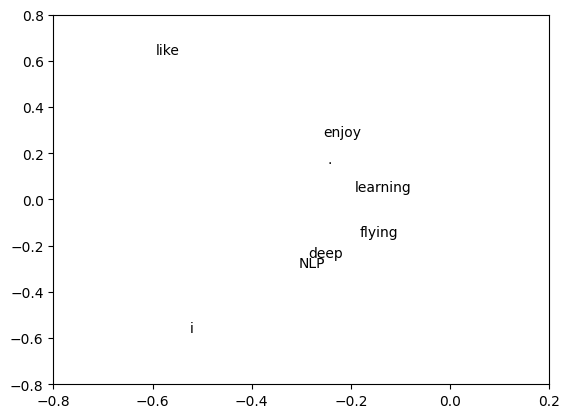

In [ ]:
# plot 3D matrix for fine relation word in sentence
import matplotlib.pyplot as plt
for i in range(len(words)):
  plt.text(U[i,0], U[i,1], words[i])
plt.ylim(-0.8,0.8)
plt.xlim(-0.8,0.2)
plt.show()

advantage:

-word order.

-semantic information.

-Co-occurrence-based

disadvantage:

use time to calculate and if we has a new word should calculate again


other Word Embedding:

GloVe and BERT